# Generative Models for Classification
As we have already discussed, discriminative models aim to find a direct mapping from inputs to predicted labels. Probabilistic discriminative models, in particular, do so by directly modeling the conditional probability distribution

$$P(Y=k|X=\mathbf{x})$$

This is for instance the case of a logistic regressor.

Generative models are another class of algorithms which do not explicitly model the conditional probability. Instead, they model the probability of the predictors independently for each class:

$$P(\mathbf{x}|Y=k)$$

and then use the Bayes' theorem to obtain the conditional probability and make predictions.

Differently from discriminative models, generative models make assumptions on the distribution of the data (e.g., data is often assumed to be Guassian) and hence are often less general than discriminative models. However, they can be advantageous **when the training data is scarce**. Also, while discriminative models such as the logistic regressor are unstable when data is linearly separable, generative approaches do not suffer from this limitation.

Generative models are so called because, by modeling the distribution of the data, they provide a complete data model which may also be used to generate new data following the joint probability distribution

$$P(X,Y)$$

even if they are mainly used to perform classification in this context.

## Maximum A Posteriori (MAP) Classification Principle
Let us consider the conditional probability:

$$P(c|\mathbf{x})$$

Rather than trying to estimate the probability $P(c|\mathbf{x})$ directly, generative models rely on Bayes' theorem:

$$P\left( C \middle| X \right) = \frac{P\left( X \middle| C \right)P(C)}{P(X)}$$

As seen in the case of probabilistic discriminative methods (e.g., logistic regressor), we can define our classification algorithm as follows:

$$h\left( \mathbf{x} \right) = \arg_{c}{\max{P\left( c \middle| \mathbf{x} \right)}} = \arg_{c}{\max{\frac{P\left( X \middle| c \right)P(c)}{P(X)}}}$$

We note that, if we are not interested in computing the actual probabilities $$P(c|\mathbf{x})$$, but we only want to assign $\mathbf{x}$ to the most likely class, we can drop the evidence $P(X)$, which is independent of class $c$. Indeed we note that:

$$P\left( c \middle| \mathbf{x} \right) = \frac{P\left( X \middle| c \right)P(c)}{P(X)} \propto P\left( X \middle| c \right)P(c)$$

Which leads to:

$$h\left( \mathbf{x} \right) = \arg_{c}{\max{P\left( c \middle| \mathbf{x} \right)}} = \arg_{c}{\max{\frac{P\left( X \middle| c \right)P(c)}{P(X)}}} = \arg_{c}{\max{P\left( X \middle| c \right)P(c)}}$$

This approach is known as Maximum A Posteriori (MAP) classification as we aim to maximize the posterior probability.

In order to implement this principle, we need to compute the following three quantities:

-   The likelihood $P(X|C)$;

-   The prior $P(C)$;

We will now see how to compute each of these quantities.

### The Prior $P(C)$

$P(C)$: this is the **prior probability of a given class**. If observing
a class $c$ is not very common, then $P(c)$ will be small. We can use
different approaches to estimate $P(c)$:

-   We can estimate $P(c)$ by **considering the number of examples in
    the dataset**. For instance, if our dataset contains $800$ non-spam
    e-mails and $200$ spam e-mails, we can assume that $P(0) = 0.2$ and
    $P(1) = 0.8$.

-   Alternatively, we could ***study* what is the proportion of examples
    in each class in the real world**. In the case of spam detection, we
    could ask a large sample of people how many e-mails they receive in
    average and how many spam e-mails they receive. These numbers can be
    used to define the prior probability.

-   Another common choice, when we don't have enough information on the
    phenomenon is to **assume that all classes are equally probable**,
    in which case $P(C) = \frac{1}{m}$*,* where $m$ is the number of
    classes.

There are many ways to define the prior probability. However, it should
be considered that this quantity should be interpreted in Bayesian
terms. This means that, by specifying a prior probability, we are
introducing our **degree of belief** on what classes are more or less
likely in the system.

### The Likelihood $P(X|C)$

While estimating the prior is easy and estimating the evidence is not necessary for classification purposes (it would be indeed necessary if we were to compute probabilities), computing the likelihood term is less straightforward.

If we have $M$ different classes, a general approach to estimate the likelihood consists in group all observations belonging to a given class $C=c$ (let's call $X_{c}$ the random variable of the examples
belonging to this group) and estimate the probability $P\left( X_{c} \right)$.

If we repeat this process for every possible value of $C$, we have
concretely estimated $P(X|C)$ as:

$$P\left( X = x \middle| C = c \right) = P(X_{c})$$

To estimate $P(X_{c})$ we will generally need to make a few assumptions. Depending on such assumptions, we obtain different generative models.

## Joint Probability MAP Classification
We will now see a simple application of the MAP principle which makes use of the direct estimation of the probability $P(X|C)$ in the case of discrete features. In particular, we will consider an example with two discrete features, so that we have to estimate $P(X_1,X_2|C)$.

Let's say we want to classify emails as **Spam** or **Ham (Not Spam)** based on the presence of the following words:
- **Offer (F1):** Yes/No
- **Free (F2):** Yes/No

Each of these can be considered a binary feature which can either be present or not. Hence both Offer and Free have two possible values "Yes" and "No".

### Step 1: Prior Probabilities

Let's start by computing prior probabilities. Counting the number of e-mails in the database, we find the following picture.

| Class  | Prior Probability \( P(C) \) |
|--------|------------------------------|
| Spam   | \( P(\text{Spam}) = 0.6 \)   |
| Ham    | \( P(\text{Ham}) = 0.4 \)    |

---

### Step 2: Contingency Tables
We now want to estimate the probabilities $P(X_1,X_2|C)$. One way to do it is to estimate the two following joint probabilities:

* $P(Offer,Free|Spam)$
* $P(Offer,Free|Ham)$

We will estimate each of them with a contingency table.

**Spam Class Contingency Table**

Let's say we obtain the following "spam" contingency table:

| **Free (F2)** | Yes  | No   | Total |
|---------------|------|------|-------|
| **Offer (F1)** Yes  | 30   | 10   | 40    |
| **Offer (F1)** No   | 20   | 10   | 30    |
| **Total**          | 50   | 20   | 70    |

This is obtained by looking at co-occurrences of features for elements in the "spam class".

**Ham Class Contingency Table**

Similarly, we obtain the "ham" contingency table:

| **Free (F2)** | Yes  | No   | Total |
|---------------|------|------|-------|
| **Offer (F1)** Yes  | 5    | 15   | 20    |
| **Offer (F1)** No   | 10   | 30   | 40    |
| **Total**          | 15   | 45   | 60    |


### Step 3: Normalize Counts to Obtain Joint Probabilities
We can now normalize counts to obtain joint probabilities:


**Normalized Probabilities for Spam Class**

| **Free (F2)** | Yes           | No            | Total |
|---------------|---------------|---------------|-------|
| **Offer (F1)** Yes  | $ \frac{30}{70} = 0.429 $ | $ \frac{10}{70} = 0.143 $ | 0.571 |
| **Offer (F1)** No   | $ \frac{20}{70} = 0.286 $ | $ \frac{10}{70} = 0.143 $ | 0.429 |
| **Total**          | 0.714         | 0.286         | 1     |

**Normalized Probabilities for Ham Class**

| **Free (F2)** | Yes           | No            | Total |
|---------------|---------------|---------------|-------|
| **Offer (F1)** Yes  | $ \frac{5}{60} = 0.083 $  | $ \frac{15}{60} = 0.250 $ | 0.333 |
| **Offer (F1)** No   | $ \frac{10}{60} = 0.167 $ | $ \frac{30}{60} = 0.500 $ | 0.667 |
| **Total**          | 0.250         | 0.750         | 1     |


We now have all we need to implement an MAP classifier.

### Step 4: Inference for a New Email Observation
Let's see how to classify an email with the following characteristics:
- **Offer = Yes**
- **Free = Yes**


Applying the MAP rule, we obtain:

**For Spam:**

$$P(\text{Spam} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) \propto P(\text{Spam}) \times P(\text{Yes, Yes} \mid \text{Spam})$$

$$P(\text{Spam} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) \propto 0.6 \times 0.429 = 0.257$$

**For Ham:**

$$P(\text{Ham} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) \propto P(\text{Ham}) \times P(\text{Yes, Yes} \mid \text{Ham})$$

$$P(\text{Ham} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) \propto 0.4 \times 0.083 = 0.033$$

We note that:

$$P(\text{Spam}) \times P(\text{Yes, Yes} \mid \text{Spam}) > P(\text{Ham}) P(\text{Yes, Yes} \mid \text{Ham})$$

Hence, we can classify the example as **Spam**.

While this is not required in MAP classification, in this case, it is also easy to compute the actual probabilities:

$$
P(\text{Spam} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) = \frac{0.257}{0.257 + 0.033} = \frac{0.257}{0.29} \approx 0.886
$$

$$
P(\text{Ham} \mid \text{Offer} = \text{Yes}, \text{Free} = \text{Yes}) = \frac{0.033}{0.257 + 0.033} = \frac{0.033}{0.29} \approx 0.114
$$

## Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a generative approach with a discriminative interpretation that brings to a formulation similar to Fisher's Linear Discriminant (FLD), but making additional assumptions on the data, notably that **examples within a class are normally distributed and that they share the same covariance matrix across classes**. These assumption are made because LDA is an essence a generative algorithm which needs to perform density estimation. As FLD, also LDA is closely related to PCA in that it finds a linear transformation of the data which better explains it (in the case of LDA the aim is to discriminate the different classes).

### Linear Discriminant Analysis for D=1
We will start by considering the case in which the data is uni-dimensional, hence $D=1$. Recall that, since LDA is a generative algorithm, our goal is to estimate the terms:

$$P(x|C_k)=P(X_k)$$

for all classes $k=1,\ldots,K$.

LDA makes the assumption that the observations will distribute in a Guassian way within each class. Hence, in the one-dimensional case, we will assume that:

$$P(X_k) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} \exp \left( - \frac{1}{2 \sigma^2_k} (x - \mu_k)^2 \right)$$

where $\mu_k$ and $\sigma_k^2$ are the mean and variance of the observations in class $k$.

LDA further assumes that data in each class have the same variance:

$$\sigma^2 = \sigma_1^2 = \ldots = \sigma_K^2$$

Using Bayes' theorem, we can estimate the posterior probability as follows:

$$P(C_k|x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left( -\frac{1}{2 \sigma^2} (x-\mu_k)^2 \right)}}{\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left( -\frac{1}{2 \sigma^2} (x-\mu_l)^2 \right)}}$$

Where we let

$$\pi_k = P(C_k)$$

and

$$P(x) = \sum_{l=1}^K P(x|C_l) P(C_l) = \sum_{l=1}^K P(X_l) P(C_l) = \sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left( -\frac{1}{2 \sigma^2} (x-\mu_l)^2 \right)}$$

By the MAP principle, we will assign $x$ the class $k$ maximizing the posterior probability $P(C_k|x)$:

$$h(x) = \arg_k\max P(C_k|x) $$

#### LDA and Mahalanobis Distance
Since the logarithm is a monotonic function, maximizing $P(C_k|x)$ is equivalent to maximizing $\log P(C_k|x)$. Taking the logarithm of $P(C_k|x)$, we obtain:

$$log(P(C_k|x)) = \log \pi_k - \frac{1}{2\sigma^2} (x-\mu_k)^2 + Cst.$$

Where $Cst.$ is a constant term arising from the normalization constant of the Gaussian distribution and from the denominator, which is considered a constant as it is independent of $k$.

The quantity 

$$\frac{(x-\mu_k)^2}{\sigma^2}$$

is known as the **squared Mahalanobis distance**. The Mahalanobis distance is defined as follows:

$$D_M(x) = \sqrt{\frac{(x-\mu)^2}{\sigma^2}}$$

The Mahalanobis distance measures **the distance between a point $x$ and a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$**.

Indeed, we can see it as the **number of standard deviations between $x$ and $\mu$**. By normalizing by the standard deviation, the Mahalanobis distance allows to measure the distance between Gaussian distributions of different parameters, as illustrated in the figure below:

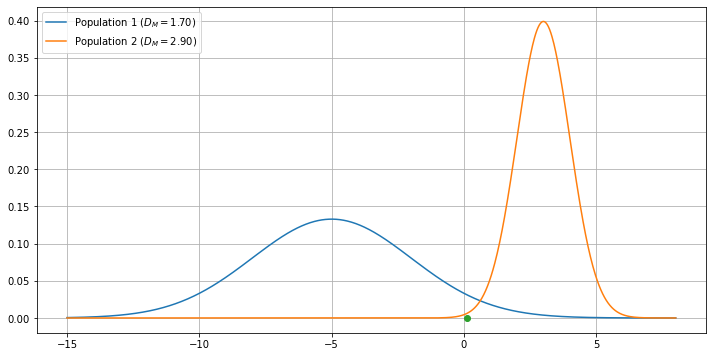

In [101]:
mu_1=-5
mu_2=3
sigma_1=3
sigma_2=1

g1 = norm(mu_1,sigma_1)
g2 = norm(mu_2,sigma_2)

x=0.1

d1 = np.sqrt(((x-mu_1)/sigma_1)**2)
d2 = np.sqrt(((x-mu_2)/sigma_2)**2)

plt.figure(figsize=(12,6))
dom=np.linspace(-15,8,1000)
plt.plot(dom,g1.pdf(dom))
plt.plot(dom,g2.pdf(dom))

plt.plot(x,0,'o')
plt.grid()
plt.legend([f'Population 1 ($D_M={d1:0.2f}$)', f'Population 2 ($D_M={d2:0.2f}$)'])
plt.show()

We can see how, even if the green dot is closer to the orange's population mean, its distance from the blue population is smaller as this distribution is more dispersed.

This is coherent with the fact that the probability value of the green point under the blue population is larger than the probability value of the same point under the orange population.

Consider the case of uniform priors $\pi_k = \frac{1}{K}, \forall k$. In this case, **we can see LDA as classifying each point by assigning it to the class with the closest distribution in terms of Mahalanobis distance**.

#### Linear Discriminant Analysis and Discriminant Function
The reasoning above suggests that LDA acts as a **discriminant function** assigning observations to one class or another based on the computation of some scores based on the Mahalanobis distance.

We can see that LDA naturally defines a **linear discriminant function**, hence the words "linear" and "discriminant" in LDA. We can re-arrange the term $\log P(C_k|x)$ as follows:

$$\delta_k(x)=\log P(C_k|x) = w_k x + w_{k0} + Cst.$$

with

$$w_k = \frac{\mu_k}{\sigma^2}$$
$$w_{k0} = \log \pi_k-\frac{\mu_k^2}{2\sigma^2}$$

Where we set $\delta_k(x)=\log P(C_k|x)$ as a shorthand notation.

From the expression above, it is clear that LDA defines **a linear discriminant** $\delta_k$, hence LDA can be considered both a **generative algorithm** (explicitly modeling probabilities $P(X_c)$) and a **discriminative one** (explicitly modeling a decision boundary).

For instance, if $K=2$ (two classes) and $\pi_1=\pi_2$ (uniform priors), then the decision boundary is given by:

$$\delta_1(x) = \delta_2(x) \Rightarrow x \cdot \frac{\mu_1}{\sigma^2} - \frac{\mu_1^2}{2 \sigma^2} + \log \pi_1 = x \cdot \frac{\mu_2}{\sigma^2} - \frac{\mu_2^2}{2 \sigma^2} + \log \pi_2 \Rightarrow$$

$$\Rightarrow x \cdot \mu_1 - \frac{\mu_1^2}{2} = x \cdot \mu_2 - \frac{\mu_2^2}{2} \Rightarrow x  = \frac{\mu_1^2 - \mu_2^2}{2 (\mu_1 - \mu_2)} \Rightarrow x = \frac{\mu_1 + \mu_2}{2}$$


Note that this point would effectively act as a threshold (hence a decision boundary) to classify elements. This is also the point in which the two Guassian distribution intersect, as shown in the figure below:

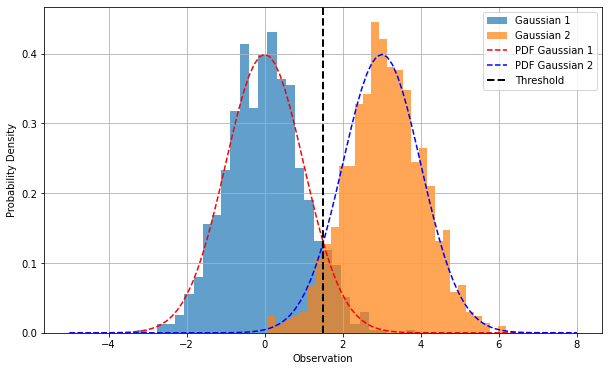

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Parameters for the first Gaussian distribution
mean1 = 0
std_dev = 1

# Parameters for the second Gaussian distribution with a different mean
mean2 = 3

# Generate random samples from the two Gaussian distributions
samples1 = np.random.normal(mean1, std_dev, 1000)
samples2 = np.random.normal(mean2, std_dev, 1000)

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(samples1, bins=30, density=True, alpha=0.7, label='Gaussian 1')
plt.hist(samples2, bins=30, density=True, alpha=0.7, label='Gaussian 2')

# Plot the probability density functions (PDFs)
x_range = np.linspace(-5, 8, 100)
plt.plot(x_range, norm.pdf(x_range, mean1, std_dev), 'r--', label='PDF Gaussian 1')
plt.plot(x_range, norm.pdf(x_range, mean2, std_dev), 'b--', label='PDF Gaussian 2')

# Find the intersection point
intersection_point = (mean1 + mean2) / 2

# Plot a vertical line at the intersection point
plt.axvline(intersection_point, color='black', linestyle='--', linewidth=2, label='Threshold')

plt.xlabel('Observation')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


When the priors are not uniform, the decision boundary will not be exactly at the intersection of the two Gaussian distributions, as shown in the figures below:

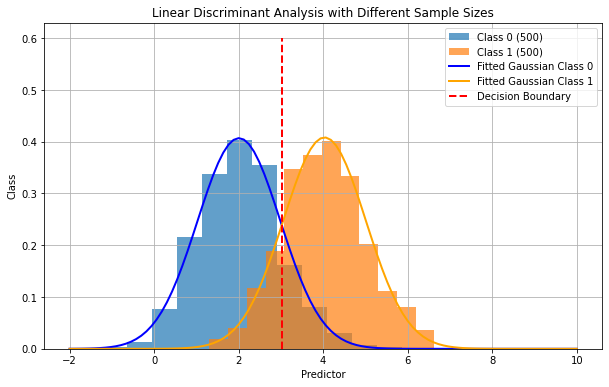

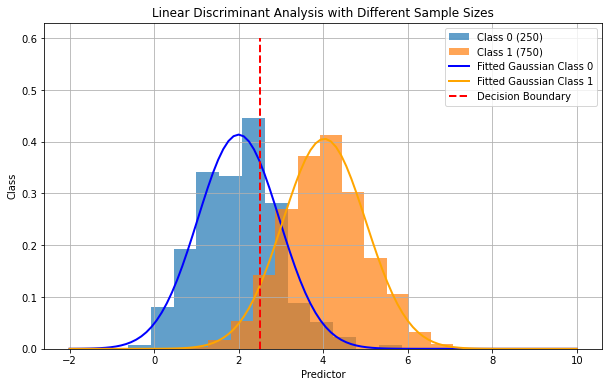

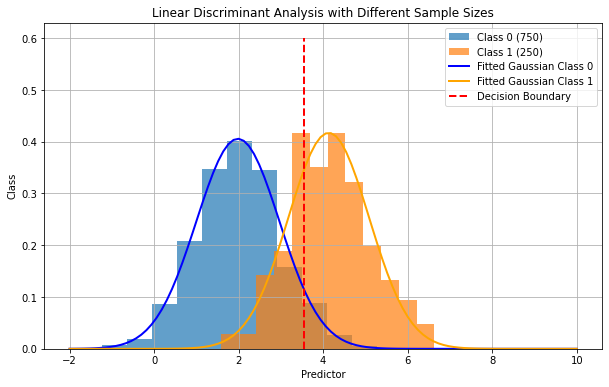

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import norm

def plot(num_samples_class0 = 100, num_samples_class1 = 100):
    # Generate synthetic data with one predictor and two classes
    np.random.seed(42)

    # Parameters for Class 0
    mean_class0 = 2
    std_dev_class0 = 1

    # Parameters for Class 1
    mean_class1 = 4
    std_dev_class1 = 1

    # Generate random samples for each class
    class0_samples = np.random.normal(mean_class0, std_dev_class0, num_samples_class0)
    class1_samples = np.random.normal(mean_class1, std_dev_class1, num_samples_class1)

    # Concatenate the samples and create corresponding labels
    X = np.concatenate((class0_samples, class1_samples))
    y = np.concatenate((np.zeros(num_samples_class0), np.ones(num_samples_class1)))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

    # Apply Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(n_components=1)
    lda.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lda.predict(X_test)

    # Plot the data and decision boundary
    plt.figure(figsize=(10, 6))

    plt.hist(class0_samples, bins=12, density=True, alpha=0.7, label=f'Class 0 ({num_samples_class0})')
    plt.hist(class1_samples, bins=12, density=True, alpha=0.7, label=f'Class 1 ({num_samples_class1})')

    # Plot the fitted Gaussian distributions
    x_range = np.linspace(-2, 10, 100)
    pdf_class0 = norm.pdf(x_range, np.mean(class0_samples), np.std(class0_samples))
    pdf_class1 = norm.pdf(x_range, np.mean(class1_samples), np.std(class1_samples))
    plt.plot(x_range, pdf_class0, color='blue', linestyle='-', linewidth=2, label='Fitted Gaussian Class 0')
    plt.plot(x_range, pdf_class1, color='orange', linestyle='-', linewidth=2, label='Fitted Gaussian Class 1')

    # Plot the decision boundary
    t = -lda.intercept_[0]/lda.coef_[0]
    plt.plot([t,t], [0,0.6], color='red', linestyle='--', linewidth=2, label='Decision Boundary')

    plt.title('Linear Discriminant Analysis with Different Sample Sizes')
    plt.xlabel('Predictor')
    plt.ylabel('Class')
    plt.legend()
    plt.grid(True)
    plt.show()

plot(500,500)
plot(250,750)
plot(750,250)

#### Optimization
In practice, we can fit the LDA classifier to the data by estimating its parameters as follows:

$$\hat{\mu}_k = \frac{1}{N_k}\sum_{i: y_i=k} x_i$$

$$\hat{\sigma}_k = \frac{1}{N-K} \sum_{k=1}^K \sum_{i:y_i=k}^N (x_i - \hat{\mu}_k)^2$$

where $N_K$ is the number of observations in class $C_k$, and $N$ is the total number of elements. In practice, the first expression computes the means within each class and the second expression can be seen as a weighted average of the variances within each class.

The priors are estimated based on the number of elements in each class:

$$\pi_k = \frac{N_k}{N}$$

### Linear Discriminant Analysis for D>1
Let us now consider the general case in which $D>1$. We will assume that our input observations are realizations of a random variable $X=(X_1,X_2, \ldots, X_D)$ following a multivariate Gaussian distribution.

We will follow the same principle consider for the uni-dimensional case and model the likelihood terms $P(X_c)$ with multivariate Gaussian distributions. Recall that the D-dimensional multivariate Gaussian is defined as follows:

$$N\left( \mathbf{x;\mu,}\mathbf{\Sigma} \right) = \sqrt{\frac{1}{(2\pi)^{D}\det(\Sigma)}}e^{( - \frac{1}{2}\left( \mathbf{x} - \mathbf{\mu} \right)^{T}\Sigma^{- 1}\left( \mathbf{x} - \mathbf{\mu} \right))}$$

Where $\mathbf{\mu}$ is a D-dimensional vector indicating the mean, and $\mathbf{\Sigma}$ is the $D \times D$ covariance matrix.

In the multivariate case ($D>1$) LDA assumes that observations in class $k$ follow a D-dimensional Gaussian distribution with mean $\mathbf{\mu}_k$ and covariance matrix $\mathbf{\Sigma}$. As in the previous case, we will assume that all classes have the same covariance matrix $\mathbf{\Sigma}$, while means can be distinct. Hence, we will model:

$$P(\mathbf{x}|C_k) = N(\mathbf{x}; \mathbf{\mu}_k, \mathbf{\Sigma}) = \sqrt{\frac{1}{(2\pi)^{D}\det(\Sigma)}}e^{( - \frac{1}{2}\left( \mathbf{x} - \mathbf{\mu}_k \right)^{T}\Sigma^{- 1}\left( \mathbf{x} - \mathbf{\mu}_k \right))}$$

We can estimate the posterior probability as follows:

$$P(C_k|\mathbf{x}) = \frac{\pi_k \sqrt{\frac{1}{(2\pi)^{D}\det(\Sigma)}}e^{( - \frac{1}{2}\left( \mathbf{x} - \mathbf{\mu}_k \right)^{T}\Sigma^{- 1}\left( \mathbf{x} - \mathbf{\mu}_k \right))}}{\sum_{l=1}^K \pi_l \sqrt{\frac{1}{(2\pi)^{D}\det(\Sigma)}}e^{( - \frac{1}{2}\left( \mathbf{x} - \mathbf{\mu}_l \right)^{T}\Sigma^{- 1}\left( \mathbf{x} - \mathbf{\mu}_l \right))}}$$

#### Multidimensional Mahalanobis Distance
Taking the logarithm of the posterior, we obtain:

$$\log P(C_k|\mathbf{x}) = -\frac{1}{2} (\mathbf{x} - \mathbf{\mu}_k)^T \mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu}_k) + \log \pi_k + Cst.$$

This is the multivariate version of the expression seen in the unidimensional case ($D=1$). Note that the expression

$$(\mathbf{x} - \mathbf{\mu}_k)^T \mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu}_k)$$

is the **generalization to multiple dimensions of the squared Mahalanobis distance**. The Mahalanobis distance is indeed defined as follows in the multidimensional case:

$$D_M(\mathbf{x}) = \sqrt{(\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1}(\mathbf{x}-\mathbf{\mu})}$$

In this case, the Mahalanobis distance estimates **the distance between a multidimensional point $\mathbf{x}$ and a multivariate Gaussian distribution**. To do so, we need to take into account the covariance matrix of each distribution, which defines how the data vary along the different directions.

The plot below shows an example:

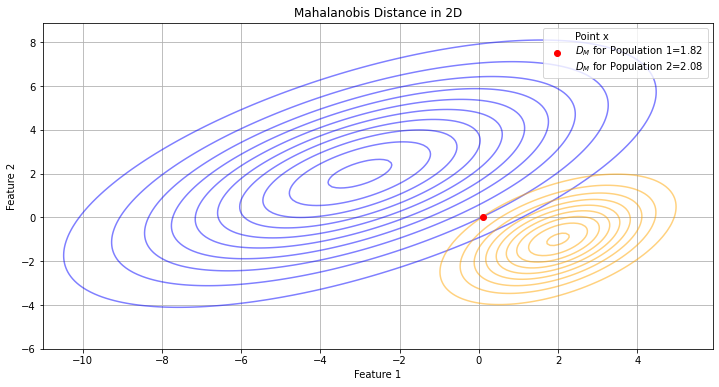

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for Population 1
mu_1 = np.array([-3, 2])
cov_1 = np.array([[3, 1.5], [1.5, 2]])*4

# Parameters for Population 2
mu_2 = np.array([2, -1])
cov_2 = np.array([[2, 1], [1, 2]])

# Create multivariate normal distributions
g1 = multivariate_normal(mu_1, cov_1)
g2 = multivariate_normal(mu_2, cov_2)

# Point for Mahalanobis distance calculation
point = np.array([0.1, 0])

# Calculate Mahalanobis distances
d1 = np.sqrt(np.linalg.multi_dot([(point - mu_1).T, np.linalg.inv(cov_1), point - mu_1]))
d2 = np.sqrt(np.linalg.multi_dot([(point - mu_2).T, np.linalg.inv(cov_2), point - mu_2]))

# Create a 2D plot
x, y = np.mgrid[-11:6:0.1, -6:9:0.1]
pos = np.dstack((x, y))

plt.figure(figsize=(12, 6))

# Plot the contours of the multivariate normal distributions
plt.contour(x, y, g1.pdf(pos), levels=10, colors='blue', alpha=0.5)
plt.contour(x, y, g2.pdf(pos), levels=10, colors='orange', alpha=0.5)

# Plot the Mahalanobis distance point
plt.plot(point[0], point[1], 'o', color='red', label=f'Point x\n$D_M$ for Population 1={d1:.2f}\n$D_M$ for Population 2={d2:.2f}')

plt.title('Mahalanobis Distance in 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


We can again see LDA as classifying $\mathbf{x}$ with the class with the closest Gaussian distribution in terms of Mahalanobis distance.

#### Linear Discriminant Function

Also in this case, LDA allows to define a multi-class linear discriminant function:

$$\delta_k(\mathbf{x}) = \log(P(C_k|\mathbf{x}))) = \mathbf{w}_k^T \mathbf{x} + w_{k0} + Cst.$$

where:

$$\mathbf{w}_k = \mathbf{\Sigma}^{-1}\mathbf{\mu}_k$$
$$w_{k0} = -\frac{1}{2} \mathbf{\mu}_k^T \Sigma^{-1} \mathbf{\mu}_k + \log \pi_k$$

We can see $\delta_k$ as a linear function of $\mathbf{x}$. Note that the decision boundary will be made of all points $\mathbf{x}$ such that

$$\delta_i(\mathbf{x}) = \delta_j(\mathbf{x}), i \neq j$$

We will not see the mathematical formulation in details, but it is easy to see that will be linear functions as well. The following figure shows Gaussian fits and decision boundary for a simple example:

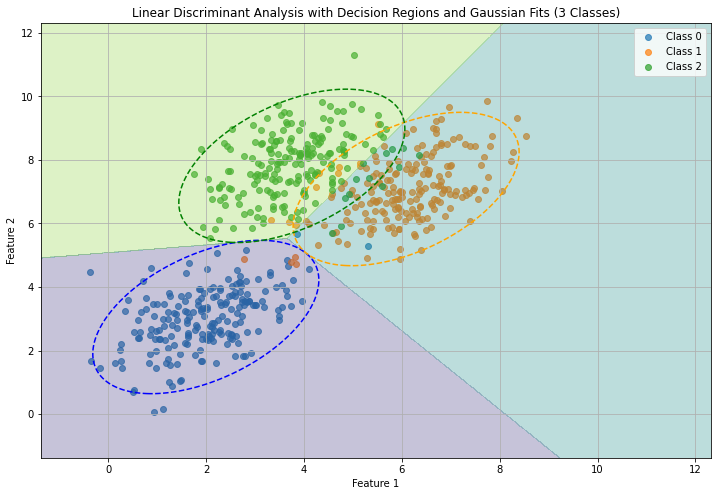

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

# Generate synthetic data with two predictors and three classes
np.random.seed(42)

mean_class0 = [2, 3]
mean_class1 = [6, 7]
mean_class2 = [4, 8]
cov_matrix = [[1, 0.5], [0.5, 1]]

num_samples = 200

class0_samples = np.random.multivariate_normal(mean_class0, cov_matrix, num_samples)
class1_samples = np.random.multivariate_normal(mean_class1, cov_matrix, num_samples)
class2_samples = np.random.multivariate_normal(mean_class2, cov_matrix, num_samples)

X = np.concatenate((class0_samples, class1_samples, class2_samples))
y = np.concatenate((np.zeros(num_samples), np.ones(num_samples), 2 * np.ones(num_samples)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)

# Generate a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
m1 = np.min([x_min, y_min])
m2 = np.max([x_max, y_max])
xx, yy = np.meshgrid(np.arange(m1, m2, 0.01), np.arange(m1, m2, 0.01))

# Predict the class for each point in the meshgrid
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data, decision regions, and Gaussian fits
plt.figure(figsize=(12, 8))

# Plot the samples for each class
plt.scatter(class0_samples[:, 0], class0_samples[:, 1], label='Class 0', alpha=0.7)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1', alpha=0.7)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2', alpha=0.7)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(4) - 0.5, cmap='viridis')

# Fit Gaussian distributions to each class
class0_gaussian = multivariate_normal(mean=lda.means_[0], cov=lda.covariance_)
class1_gaussian = multivariate_normal(mean=lda.means_[1], cov=lda.covariance_)
class2_gaussian = multivariate_normal(mean=lda.means_[2], cov=lda.covariance_)

# Plot the Gaussian fits
plt.contour(xx, yy, class0_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='blue', linestyles='dashed')
plt.contour(xx, yy, class1_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='orange', linestyles='dashed')
plt.contour(xx, yy, class2_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='green', linestyles='dashed')

plt.title('Linear Discriminant Analysis with Decision Regions and Gaussian Fits (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


The parameters of the LDA classifier will be fit to the data with the following formulas:

$$\hat{\mathbf{\mu}}_k = \frac{1}{N_k}\sum_{i: y_i=k} \mathbf{x}_i$$

$$\hat{\mathbf{\Sigma}}_k = \frac{1}{N-K} \sum_{k=1}^K \sum_{i:y_i=k}^N (\mathbf{x}_i - \hat{\mathbf{\mu}}_k)(\mathbf{x}_i - \hat{\mathbf{\mu}}_k)^T$$

### LDA for Dimensionality Reduction
Linear Discriminant Analysis can also be used for dimensionality reduction, similar to Fisher's Linear Discriminant. We will not see the mathematical details, but LDA arrives at a similar solution as FLD with some technical differences. It is useful to know that libraries such as scikit-learn often implement both versions of LDA (classification and dimensionality reduction). More information can be found here: https://scikit-learn.org/stable/modules/lda_qda.html#mathematical-formulation-of-lda-dimensionality-reduction

## Quadratic Discriminant Analysis (QDA)
Quadratic Discriminant Analysis has formulation similar to the one of Linear Discriminant Analysis, but it **removes the assumption that covariance matrices in the different classes should be the same**, which was formulated as:

$$\mathbf{\Sigma}_1 = \mathbf{\Sigma}_2 = \ldots = \mathbf{\Sigma}_k = \mathbf{\Sigma}$$

In this sense, LDA can be seen as a specific case of QDA.

We will not see the mathematical details, but, dropping this constraint makes the decision boundary between classes a **quadratic function**, rather than **a linear one**, hence the term "quadratic" in QDA.

The figure below compares LDA and QDA for classes with different covariance matrices:

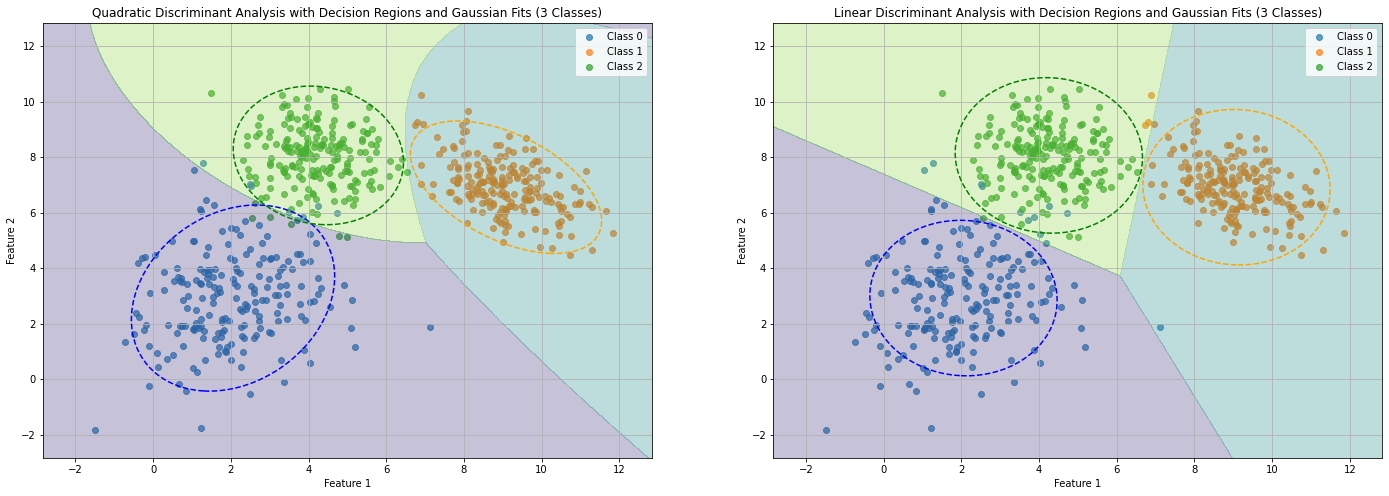

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal


# Generate synthetic data with two predictors and three classes
np.random.seed(42)

mean_class0 = [2, 3]
mean_class1 = [9, 7]
mean_class2 = [4, 8]
cov_matrix1 = [[2, 0.5], [0.5, 3]]
cov_matrix2 = [[1, -0.5], [-0.5, 1]]
cov_matrix3 = [[1, 0], [0, 1]]

num_samples = 200

class0_samples = np.random.multivariate_normal(mean_class0, cov_matrix1, num_samples)
class1_samples = np.random.multivariate_normal(mean_class1, cov_matrix2, num_samples)
class2_samples = np.random.multivariate_normal(mean_class2, cov_matrix3, num_samples)

X = np.concatenate((class0_samples, class1_samples, class2_samples))
y = np.concatenate((np.zeros(num_samples), np.ones(num_samples), 2 * np.ones(num_samples)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.figure(figsize=(24, 8))
plt.subplot(121)
# Apply Linear Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)

# Generate a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
m1 = np.min([x_min, y_min])
m2 = np.max([x_max, y_max])
xx, yy = np.meshgrid(np.arange(m1, m2, 0.01), np.arange(m1, m2, 0.01))

# Predict the class for each point in the meshgrid
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the samples for each class
plt.scatter(class0_samples[:, 0], class0_samples[:, 1], label='Class 0', alpha=0.7)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1', alpha=0.7)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2', alpha=0.7)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(4) - 0.5, cmap='viridis')

# Fit Gaussian distributions to each class
class0_gaussian = multivariate_normal(mean=qda.means_[0], cov=qda.covariance_[0])
class1_gaussian = multivariate_normal(mean=qda.means_[1], cov=qda.covariance_[1])
class2_gaussian = multivariate_normal(mean=qda.means_[2], cov=qda.covariance_[2])

# Plot the Gaussian fits
plt.contour(xx, yy, class0_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='blue', linestyles='dashed')
plt.contour(xx, yy, class1_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='orange', linestyles='dashed')
plt.contour(xx, yy, class2_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='green', linestyles='dashed')

plt.title('Quadratic Discriminant Analysis with Decision Regions and Gaussian Fits (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)


plt.subplot(122)
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)

# Generate a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
m1 = np.min([x_min, y_min])
m2 = np.max([x_max, y_max])
xx, yy = np.meshgrid(np.arange(m1, m2, 0.01), np.arange(m1, m2, 0.01))

# Predict the class for each point in the meshgrid
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the samples for each class
plt.scatter(class0_samples[:, 0], class0_samples[:, 1], label='Class 0', alpha=0.7)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1', alpha=0.7)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2', alpha=0.7)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(4) - 0.5, cmap='viridis')

# Fit Gaussian distributions to each class
class0_gaussian = multivariate_normal(mean=lda.means_[0], cov=lda.covariance_)
class1_gaussian = multivariate_normal(mean=lda.means_[1], cov=lda.covariance_)
class2_gaussian = multivariate_normal(mean=lda.means_[2], cov=lda.covariance_)

# Plot the Gaussian fits
plt.contour(xx, yy, class0_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='blue', linestyles='dashed')
plt.contour(xx, yy, class1_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='orange', linestyles='dashed')
plt.contour(xx, yy, class2_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='green', linestyles='dashed')

plt.title('Linear Discriminant Analysis with Decision Regions and Gaussian Fits (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


## Naïve Bayes Classifier
Let us consider the problem of classifying **e-mail messages as spam
or non-spam**, with the e-mails represented with bag of words (a representation which counts the number of occurrences of each word given a vocabulary), with
**vocabulary size equal to 20000 words**. In this example, we will
consider $X = \lbrack X_{1},\ldots,X_{n}\rbrack$ (e.g., $n = 20000)$ as
a multi-dimensional random variable containing the features and $C$ as
the random variable representing the class.

If we want to apply the MAP rule, we obtain:

$$f(\mathbf{x}) = \arg_{c}{\max{P\left( \mathbf{x} \middle| c \right)}}P(c)$$

When the dimensionality of the input data is very high, modeling
$P(X|C)$ directly as seen before is very challenging.

For instance, **if we wanted to fit a 20000-D Gaussian**, we would have
to compute $Cov(X)$. This would be a matrix of dimension
$20000 \times 20000$, which **would require about 1.5GB in single
precision**!


### Naïve Assumption

We have seen that probabilities can be factorized using the product
rule. Hence, we could obtain:

$$P\left( X \middle| C \right) = P\left( X_{1},\ldots,X_{n} \middle| C \right) = P\left( X_{1} \middle| C \right)P\left( X_{2} \middle| X_{1},C \right)P\left( X_{3} \middle| X_{2},X_{1},C \right)\ldots P(X_{n}|X_{1},\ldots,X_{n - 1},C)$$

However, this is not a very helpful factorization as the terms
$P(X_{i}|X_{1},\ldots,X_{i - 1},C)$ are conditioned also on other
features, which makes them not easy to model.

We can make the **naïve assumption** that **the input features are
conditionally independent given the class**. That is, if the examples are
represented by the multimodal random variable
$X = \lbrack X_{1},\ldots,X_{n}\rbrack$ (features) and $C$ (class):

$$X_{i}\bot X_{j}\ |\ C,\ \forall i \neq j$$

If $X_{i}$ and $X_{j}$ are **word counts**, then we are saying that if I
take all non-spam e-mails, then the number of occurrences of a given
word **does not influence** the number of occurrences of **another
word**. This is **obviously not true in general!** For instance, there
can be legitimate e-mails of different topics. If the e-mail is about a
vacation, the words 'trip', 'flight', 'luggage' will appear often.
Instead, if the e-mail is about work, the words 'meeting', 'report',
'time', will appear more often. This means that, within the same
category (non-spam e-mails), the number of occurrences of a word (e.g.,
'trip') may be related to the number of occurrences of another words
(e.g., 'flight'), which breaks the assumption of **conditional
independence**. This is why this assumption is called **naïve
assumption**. With this in mind, it should be considered that, despite
such naïve assumption, the Naïve Bayes Classifier works surprisingly
well in many contexts.

We know that:

$$X\bot Y|Z \Leftrightarrow P\left( X,Y|Z \right) = P\left( X|Z \right)P\left( Y|Z \right)$$

Hence, we discover that, under the assumption of conditional
independence:

$$P\left( X_{1},\ldots,X_{n} \middle| C \right) = P\left( X_{1} \middle| C \right)P\left( X_{2} \middle| C \right)\ldots P(X_{n}|C)$$

So, we can re-write the MAP classification rule as:

$$f(\mathbf{x}) = \arg_{c}max\ P\left( \mathbf{x}_{1} \middle| c \right)\left( \mathbf{x}_{2} \middle| c \right)\ldots P\left( \mathbf{x}_{n} \middle| c \right)P(c)$$

The single $P(X_{1}|C)$ terms are now easy to model, since $X_{1}$ is
mono-dimensional. In practice, depending on the considered problem, we
can model these terms in different ways. Two common approaches,
depending on the data, are to use a Gaussian distribution or a
Multinomial distribution.

When we use Gaussian distributions to model the $P(X_{i}|C)$ terms, the
classification method is called "Gaussian Naïve Bayes). Similarly, if we
consider a multinomial distribution, the classification method is called
"Multinomial Naïve Bayes".



### Gaussian Naïve Bayes

Let us consider again our sex classification example based on height and
weight. We will consider $X = \lbrack H,W\rbrack$, which are random
variables representing heights and weights of subjects. If we assume
that the data is approximately Gaussian, the probabilities $P(H|C)$ and
$P(W|C)$ can be modeled with univariate (1D) Gaussian distributions.
This is done by first obtaining four samples:

-   $H_{1}$: the heights of subjects when $C = 1$;

-   $W_{1}$: the weights of subjects when $C = 1;$

-   $H_{0}$: the heights of subjects when $C = 0$;

-   $W_{0}$: the weights of subjects when $C = 0.$

> We hence model each sample as a 1D Gaussian distribution by computing
> a mean and a variance value from each of these samples to obtain four
> Gaussian distributions:

-   $P\left( H = h \middle| C = 0 \right) = N(x;\mu_{1},\sigma_{1})$;

-   $P\left( W = w \middle| C = 0 \right) = N(x;\mu_{2},\sigma_{2})$;

-   $P\left( H = h \middle| C = 1 \right) = N(x;\mu_{3},\sigma_{3})$;

-   $P\left( W = w \middle| C = 1 \right) = N(x;\mu_{4},\sigma_{4})$;

After this, we can apply the classification rule:

-   The example $(h,w)$ is classified as class 1 if

$P\left( h \middle| C = 1 \right)P\left( w \middle| C = 1 \right)P(C = 1) > P\left( h \middle| C = 0 \right)P\left( w \middle| C = 0 \right)P(C = 0)$;

-   The example $(h,w)$ is classified as class 0 otherwise.

We can exemplify this process as follows:

![](/_static/lecture_specific/classification/map_weight3.png)

### Naive Bayes and QDA
We will not see it in details, but it can be shown that a **Gaussian Naive Bayes classifier is equivalent to a Quadratic Discriminant Analysis classifier with diagonal covariance matrices**. By forcing the covariance matrices to have zeros on all off-diagonal elements, we are assuming that variables are **conditionally independent with respect to classes** (hence independent within each class).

The figure below compares a Quadratic Discriminant Analysis classifier with a Gaussian Naive Bayes on the same data:

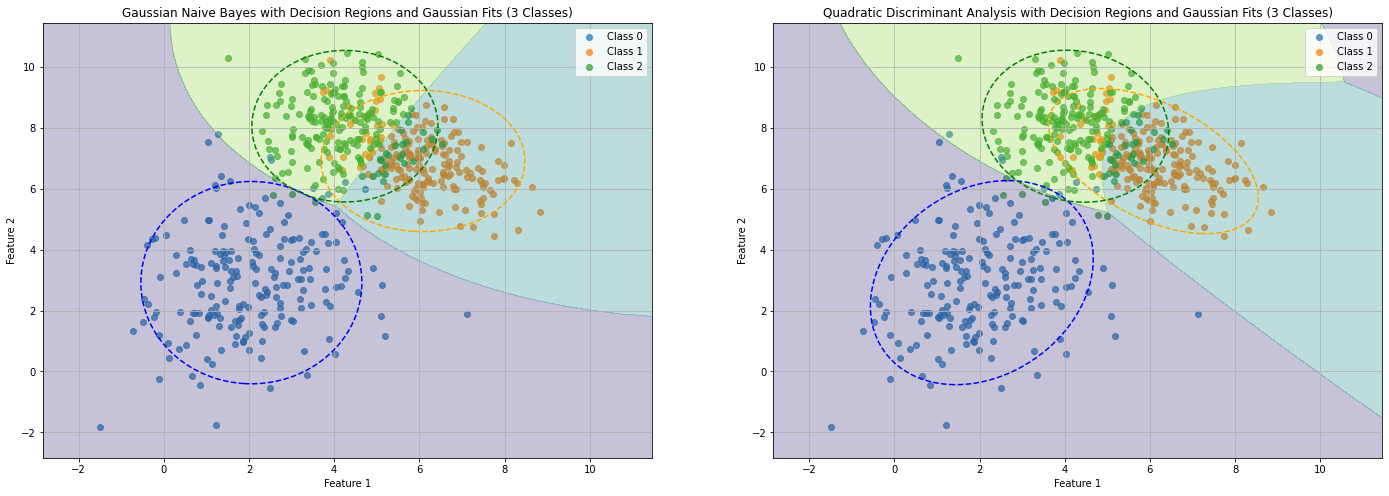

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

# Generate synthetic data with two predictors and three classes
np.random.seed(42)

mean_class0 = [2, 3]
mean_class1 = [6, 7]
mean_class2 = [4, 8]
cov_matrix1 = [[2, 0.5], [0.5, 3]]
cov_matrix2 = [[1, -0.5], [-0.5, 1]]
cov_matrix3 = [[1, 0], [0, 1]]

num_samples = 200

class0_samples = np.random.multivariate_normal(mean_class0, cov_matrix1, num_samples)
class1_samples = np.random.multivariate_normal(mean_class1, cov_matrix2, num_samples)
class2_samples = np.random.multivariate_normal(mean_class2, cov_matrix3, num_samples)

X = np.concatenate((class0_samples, class1_samples, class2_samples))
y = np.concatenate((np.zeros(num_samples), np.ones(num_samples), 2 * np.ones(num_samples)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Plot the data, decision regions, and Gaussian fits
plt.figure(figsize=(24, 8))
plt.subplot(121)
# Apply Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Generate a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
m1 = np.min([x_min, y_min])
m2 = np.max([x_max, y_max])
xx, yy = np.meshgrid(np.arange(m1, m2, 0.01), np.arange(m1, m2, 0.01))

# Predict the class for each point in the meshgrid
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the samples for each class
plt.scatter(class0_samples[:, 0], class0_samples[:, 1], label='Class 0', alpha=0.7)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1', alpha=0.7)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2', alpha=0.7)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(4) - 0.5, cmap='viridis')

# Plot the Gaussian fits
plt.contour(xx, yy, multivariate_normal(mean=gnb.theta_[0], cov=np.diag(gnb.var_[0])).pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='blue', linestyles='dashed')
plt.contour(xx, yy, multivariate_normal(mean=gnb.theta_[1], cov=np.diag(gnb.var_[1])).pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='orange', linestyles='dashed')
plt.contour(xx, yy, multivariate_normal(mean=gnb.theta_[2], cov=np.diag(gnb.var_[2])).pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='green', linestyles='dashed')

plt.title('Gaussian Naive Bayes with Decision Regions and Gaussian Fits (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)


plt.subplot(122)

# Apply Linear Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)

# Generate a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
m1 = np.min([x_min, y_min])
m2 = np.max([x_max, y_max])
xx, yy = np.meshgrid(np.arange(m1, m2, 0.01), np.arange(m1, m2, 0.01))

# Predict the class for each point in the meshgrid
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the samples for each class
plt.scatter(class0_samples[:, 0], class0_samples[:, 1], label='Class 0', alpha=0.7)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1', alpha=0.7)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2', alpha=0.7)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(4) - 0.5, cmap='viridis')

# Fit Gaussian distributions to each class
class0_gaussian = multivariate_normal(mean=qda.means_[0], cov=qda.covariance_[0])
class1_gaussian = multivariate_normal(mean=qda.means_[1], cov=qda.covariance_[1])
class2_gaussian = multivariate_normal(mean=qda.means_[2], cov=qda.covariance_[2])

# Plot the Gaussian fits
plt.contour(xx, yy, class0_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='blue', linestyles='dashed')
plt.contour(xx, yy, class1_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='orange', linestyles='dashed')
plt.contour(xx, yy, class2_gaussian.pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0.01], colors='green', linestyles='dashed')

plt.title('Quadratic Discriminant Analysis with Decision Regions and Gaussian Fits (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.show()


As we can see both decision boundaries are non-linear. This happens because we did not constrain all covariance matrices to be the equal.

Differently from QDA, in Gaussian Naive Bayes the fitted Gaussians are **aligned to the axes**, which is due to the naive assumption. This brings some differences in the decision boundary between class 1 and class 2 in the specific example above.

## References

-   Naïve Bayes Classifier: https://en.wikipedia.org/wiki/Naive_Bayes_classifier;
-   https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda
-   Section 4.4 of \[1\]

\[1\] James, Gareth Gareth Michael. An introduction to statistical learning: with applications in Python, 2023.https://www.statlearning.com